In [1]:
import random
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import json

import torch
import torchvision
import torch.nn.functional as F
from torchvision import transforms
from torch.utils.data import DataLoader

In [2]:
cd ..

/Users/kirillsafronov/Documents/Python/Lab/DNN


In [3]:
from src.utils import set_det_pos, get_detector_imgs
from src.DNN import Fourier_DNN, Trainer, new_Fourier_DNN

In [4]:
BATCH_SIZE = 32
IMG_SIZE = 28 * 3
N_pixels = 200
PADDING = (N_pixels - IMG_SIZE) // 2

transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Resize((IMG_SIZE,IMG_SIZE)),
                                transforms.Pad(PADDING)])
train_dataset = torchvision.datasets.MNIST("./data", train=True, transform=transform, download=True)
val_dataset = torchvision.datasets.MNIST("./data", train=False, transform=transform, download=True)
train_dataloader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_dataloader = DataLoader(dataset=val_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cpu


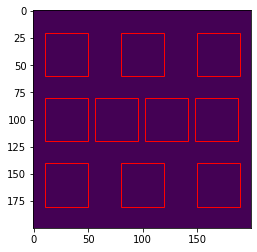

In [6]:
det_size = 40
edge_x = 10
edge_y = 20
labels_image_tensors, detector_pos = get_detector_imgs(det_size = det_size, 
                                                       edge_x = edge_x , 
                                                       edge_y = edge_y, 
                                                       N_pixels = N_pixels)
labels_image_tensors = labels_image_tensors.to(device)

# Зависимость от числа слоев

In [19]:
var_layers_acc = np.array([[3, 0.809], [5, 0.843], [7, 0.848], [10, 0.862]])

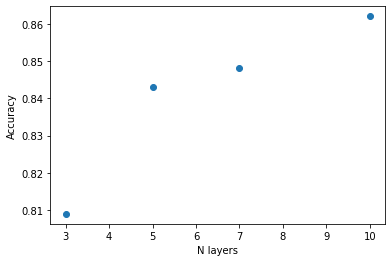

In [23]:
plt.scatter(var_layers_acc[:,0], var_layers_acc[:,1])
plt.ylabel('Accuracy')
plt.xlabel('N layers')
plt.savefig('results/Fourier+ampl_dep_on_layers.png', dpi = 600, bbox_inches = 'tight')

In [24]:
var_X_image_acc = np.array([[1, 0.827], [2, 0.86], [3, 0.843], [4, 0.831]])

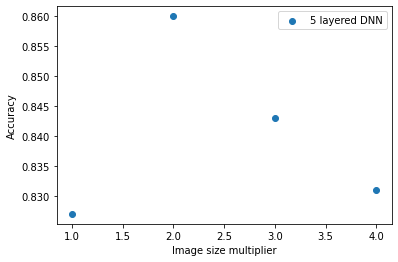

In [26]:
plt.scatter(var_X_image_acc[:,0], var_X_image_acc[:,1], label = '5 layered DNN')
plt.ylabel('Accuracy')
plt.xlabel('Image size multiplier')
plt.legend()
plt.savefig('results/Fourier+ampl_dep_on_image_size.png', dpi = 600, bbox_inches = 'tight')

In [32]:
model.mask_layers[0].wl

5.32e-07

# Зависимость от параметров для фазовой дифракционной сети

In [37]:
models = [
    'Fourier_phase_0.8053_5_layers',
    'Fourier_phase_0.773_3_layers',
    'Fourier_phase_0.6362_1_layers',
    'Fourier_phase_0.8029_7_layers',
    'Fourier_phase_0.8171_10_layers'
]

In [40]:
var_layers_acc = np.array([[1, 0.6362], [3, 0.773], [5, 0.8053], [7, 0.8029], [10, 0.8171]])

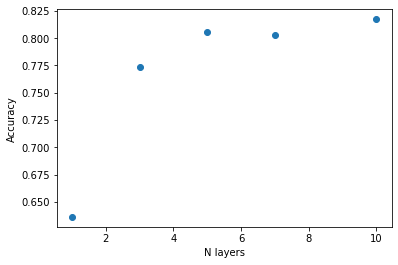

In [41]:
plt.scatter(var_layers_acc[:,0], var_layers_acc[:,1])
plt.ylabel('Accuracy')
plt.xlabel('N layers')
plt.savefig('results/Fourier_phase_dep_on_layers.png', dpi = 600, bbox_inches = 'tight')

In [ ]:
models = [
    'Fourier_phase_0.7797_0.001_distance',
    'Fourier_phase_0.8053_5_layers',
    'Fourier_phase_0.7913_0.005_distance',
    'Fourier_phase_0.7772_0.007_distance',
    'Fourier_phase_0.7691_0.01_distance',
    'Fourier_phase_0.7568_0.015_distance'
]

In [42]:
var_dist_acc = np.array([[1, 0.7797], [3, 0.8053], [5, 0.7913], [7, 0.7772], [10, 0.7691], [15, 0.7568]])

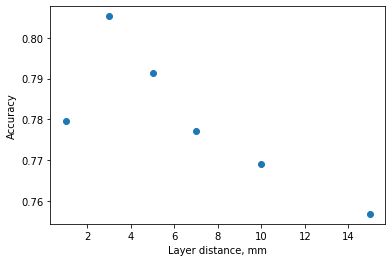

In [43]:
plt.scatter(var_dist_acc[:,0], var_dist_acc[:,1])
plt.ylabel('Accuracy')
plt.xlabel('Layer distance, mm')
plt.savefig('results/Fourier_phase_dep_on_dist.png', dpi = 600, bbox_inches = 'tight')

In [ ]:
models = [
    'Fourier_phase_0.7777_0.03_focus',
    'Fourier_phase_0.7796_0.05_focus',
    'Fourier_phase_0.7844_0.07_focus',
    'Fourier_phase_0.8053_5_layers',
    'Fourier_phase_0.795_0.12_focus',
    'Fourier_phase_0.7719_0.15_focus'
]

In [48]:
var_focus_acc = np.array([[30, 0.7777], [50, 0.7796], [70, 0.7844], [100, 0.8053], [120, 0.795],[150, 0.7719]])

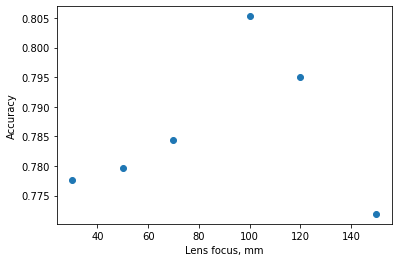

In [49]:
plt.scatter(var_focus_acc[:,0], var_focus_acc[:,1])
plt.ylabel('Accuracy')
plt.xlabel('Lens focus, mm')
plt.savefig('results/Fourier_phase_dep_on_focus.png', dpi = 600, bbox_inches = 'tight')

In [ ]:
models = [
    'Fourier_phase_0.7683_28_img_size',
    'Fourier_phase_0.798_56_img_size',
    'Fourier_phase_0.8053_5_layers',
    'Fourier_phase_0.7645_112_img_size',
    'Fourier_phase_0.7718_140_img_size'
]

In [46]:
var_img_size_acc = np.array([[28, 0.7683], [56, 0.798], [84, 0.8053], [112, 0.7645], [140, 0.7718]])

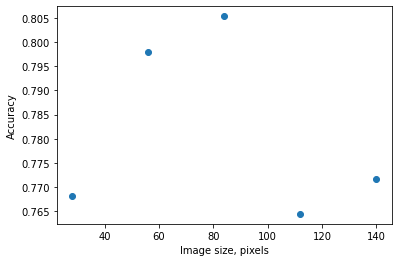

In [47]:
plt.scatter(var_img_size_acc[:,0], var_img_size_acc[:,1])
plt.ylabel('Accuracy')
plt.xlabel('Image size, pixels')
plt.savefig('results/Fourier_phase_dep_on_img_size.png', dpi = 600, bbox_inches = 'tight')

# Зависимость от параметров для амплитудно-фазовой маски

In [ ]:
models = [
    'Fourier_phase+ampl_0.6393_1_layers',
    'Fourier_phase+ampl_0.8598_3_layers',
    'Fourier_phase+ampl_0.8915_5_layers',
    'Fourier_phase+ampl_0.8991_7_layers',
    'Fourier_phase+ampl_0.9034_10_layers',
]

In [50]:
var_layers_acc = np.array([[1, 0.6393], [3, 0.8598], [5, 0.8915], [7, 0.8991], [10, 0.9034]])

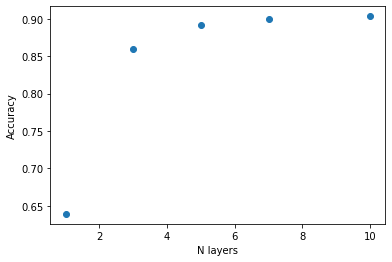

In [51]:
plt.scatter(var_layers_acc[:,0], var_layers_acc[:,1])
plt.ylabel('Accuracy')
plt.xlabel('N layers')
plt.savefig('results/Fourier_phase+ampl_dep_on_layers.png', dpi = 600, bbox_inches = 'tight')

In [ ]:

models = [
    'Fourier_phase+ampl_0.7834_0.001_imag_n.pth',
    'Fourier_phase+ampl_0.7909_0.0001_imag_n.pth',
    'Fourier_phase+ampl_0.793_0.01_imag_n.pth',
    'Fourier_phase_0.8053_5_layers'
]

In [52]:
var_imag_n_acc = np.array([[0, 0.8053], [0.01, 0.793], [0.001, 0.7834], [0.0001, 0.7909]])

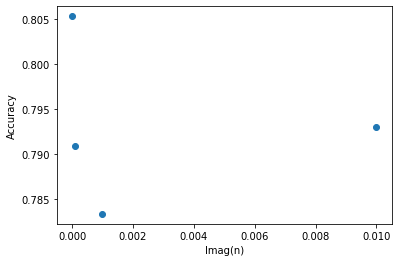

In [53]:
plt.scatter(var_imag_n_acc[:,0], var_imag_n_acc[:,1])
plt.ylabel('Accuracy')
plt.xlabel('Imag(n)')
plt.savefig('results/Fourier_phase+ampl_dep_on_imag_n.png', dpi = 600, bbox_inches = 'tight')

# Зависимость от функции потерь

In [ ]:
models = [
    'Fourier_phase_0.977_cross_entropy.pth',
    'Fourier_phase_0.9725_cross_entropy_1_layers.pth',
    'Fourier_phase_0.9756_cross_entropy_3_layers.pth',
    'Fourier_phase_0.9786_cross_entropy_7_layers.pth'
]

In [54]:
var_layers_acc = np.array([[1, 0.6362], [3, 0.773], [5, 0.8053], [7, 0.8029], [10, 0.8171]])
var_layers_CS_acc = np.array([[1, 0.9725], [3, 0.9756], [5, 0.977], [7, 0.9786]])

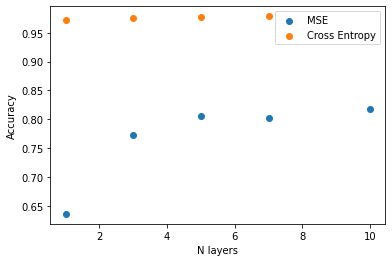

In [55]:
plt.scatter(var_layers_acc[:,0], var_layers_acc[:,1], label = 'MSE')
plt.scatter(var_layers_CS_acc[:,0], var_layers_CS_acc[:,1], label = 'Cross Entropy')
plt.ylabel('Accuracy')
plt.xlabel('N layers')
plt.legend()
plt.savefig('results/Fourier_phase_dep_on_loss.png', dpi = 600, bbox_inches = 'tight')

#

# Визуализация лучших моделей

In [7]:
from src.utils import mask_visualization, prop_vis, visualize_n_samples
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [8]:
def initialize_single_model(model_name):
    with open(model_name+'_args.json') as fp:
        model_arg = json.load(fp)
    num_layers = model_arg["N layers"] 
    wl = model_arg["Wavelength (m)"]
    N_pixels = model_arg["N pixels in phase mask"]
    pixel_size = model_arg["Pixel_size (m)"]
    distance = model_arg["Distance between layers (m)"]
    lens_focus = model_arg["Lens focus distance"] 
    include_amplitude = model_arg["Amplitude modulation"]
    if model_arg["delta refractive index (real)"] is None:
        dn = None
    else:
        dn = (model_arg["delta refractive index (real)"] + 
              1.j* model_arg["delta refractive index (imaginary)"])
    model = new_Fourier_DNN(num_layers = num_layers, 
                            wl = wl, 
                            N_pixels = N_pixels, 
                            pixel_size = pixel_size, 
                            distance = distance, 
                            lens_focus = lens_focus,
                            include_amplitude_modulation = include_amplitude,
                            dn = dn).to(device)
    model.load_state_dict(torch.load(model_name+'.pth', map_location = 'cpu'))
    return model, model_arg

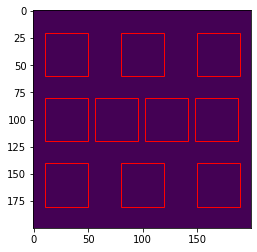

In [9]:
det_size = 40
edge_x = 10
edge_y = 20
labels_image_tensors, detector_pos = get_detector_imgs(det_size = det_size, 
                                                       edge_x = edge_x , 
                                                       edge_y = edge_y, 
                                                       N_pixels = N_pixels)
labels_image_tensors = labels_image_tensors.to(device)

In [10]:
folder = '/Users/kirillsafronov/Documents/Python/Lab/DNN/models/'
img_folder = '/Users/kirillsafronov/Documents/Python/Lab/DNN/results/'
name = 'Fourier_phase_0.9725_cross_entropy_1_layers'
name = 'Fourier_phase_0.9482_cross_entropy_MSE_5000X'
#name = 'Fourier_phase_0.9773_cross_entropy_MSE_0.5'
model, model_args = initialize_single_model(folder + name)

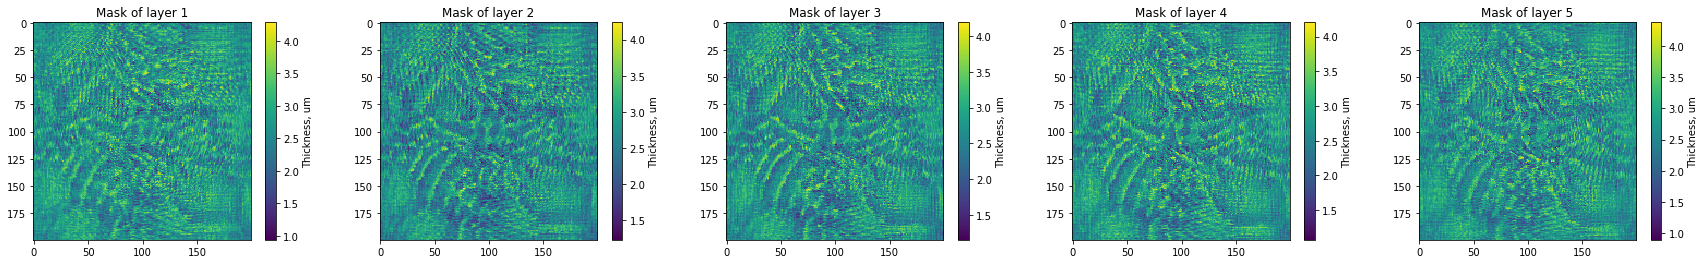

In [11]:
mask_visualization(model, 532*10**(-9), 0.1)
plt.savefig(img_folder + name + '_mask_thickness.png', dpi = 600, bbox_inches = 'tight')

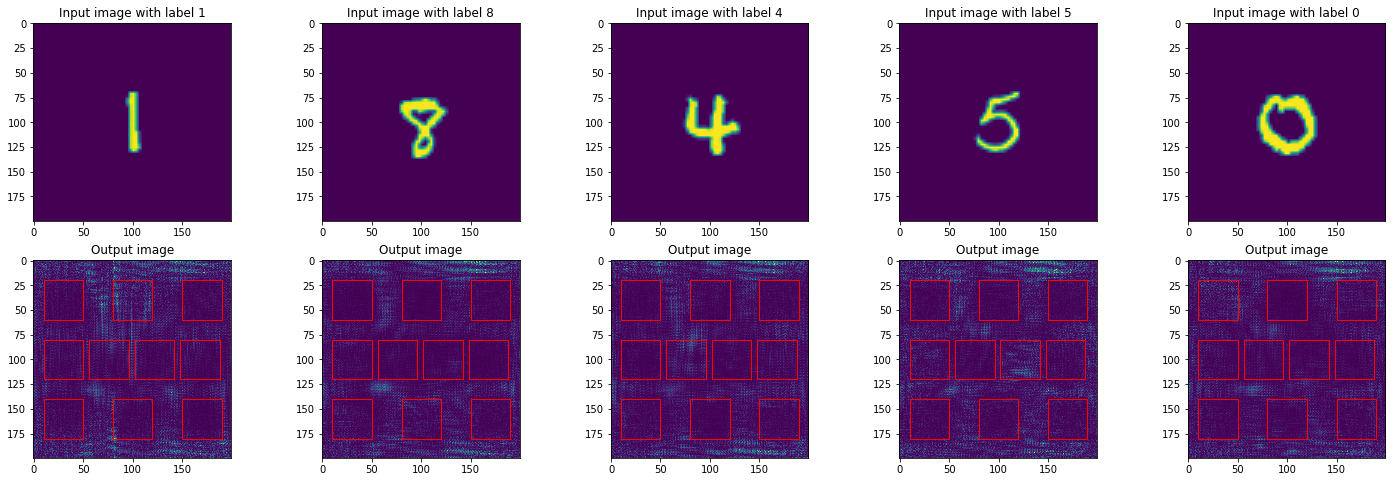

In [24]:
visualize_n_samples(model, val_dataset, n = 5, padding = 0, detector_pos = detector_pos)
plt.savefig(img_folder + name + '_example.png', dpi = 600, bbox_inches = 'tight')

In [11]:
from copy import deepcopy
def get_rough_thickness(model, thickness_step, model_args):
    wl = model_args["Wavelength (m)"]
    n = model_args["delta refractive index (real)"]
    phase_step = thickness_step / wl * 2* np.pi *n
    phases = torch.arange(0, 1 , phase_step / 2 / np.pi)
    cut_model = deepcopy(model)
    for ind, mask in enumerate(model.mask_layers):
        resid = torch.abs(torch.sigmoid(mask.phase[:,:,None]) - phases[None, None, :])
        cut_model.mask_layers[ind].phase = torch.nn.Parameter(2* np.pi* phases[torch.argmin(resid, dim = 2)])
    return cut_model

In [12]:
cut_model = get_rough_thickness(model, 1e-6, model_args)

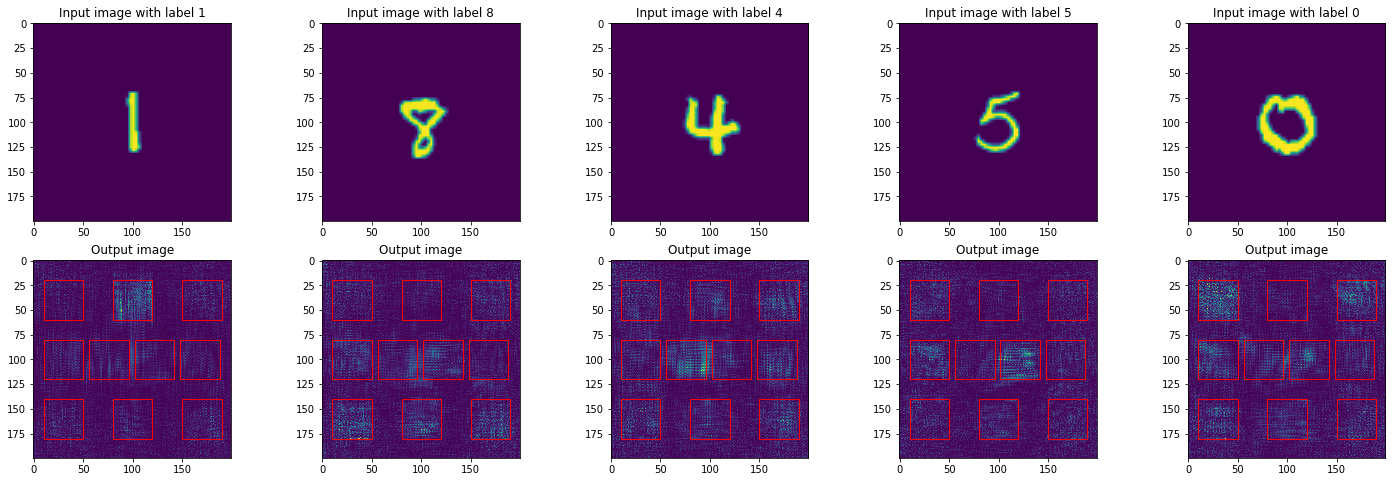

In [14]:
visualize_n_samples(cut_model, 
                    val_dataset, 
                    n = 5, 
                    padding = 0, 
                    detector_pos = detector_pos,
                    unconstain_phase = True)
plt.savefig(img_folder + name + '_example_constrained_thick.png', dpi = 600, bbox_inches = 'tight')

In [14]:
trainer = Trainer(model, detector_pos, padding = 0, device = 'cpu')
trainer_cut = Trainer(cut_model, detector_pos, padding = 0, device = 'cpu')

In [15]:
trainer.validate(val_dataloader)

0.9482

In [16]:
trainer_cut.validate(val_dataloader, unconstrain_phase = True)

0.8794